In [1]:
from fastai.vision import *
from fastai.imports import *
import numpy as np
import os

In [2]:
path = Path('downloads')

In [3]:
np.random.seed(42)

In [4]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4,bs=4).normalize(imagenet_stats)

In [5]:
data.classes

['banana', 'lemon']

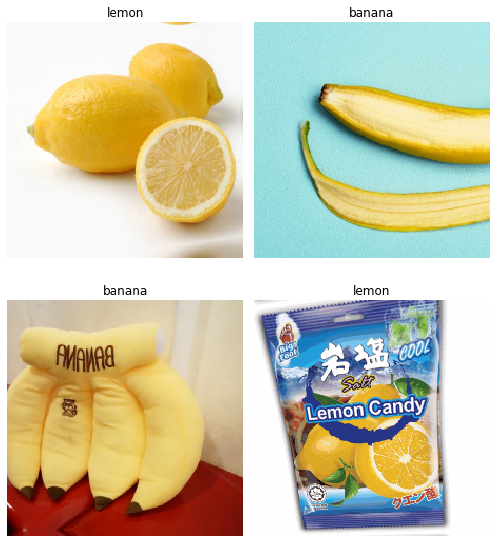

In [6]:

data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)